## 一、导入图片

-   经过多次实验以及探索，发现在灰度图上处理比较方便，在彩色图上实在难顶，所以这里先将彩色图转换为灰度图
-   由于原图的大小为 4000\*6000，过大，因此将其缩小为原图的 1/4，resize 默认插值


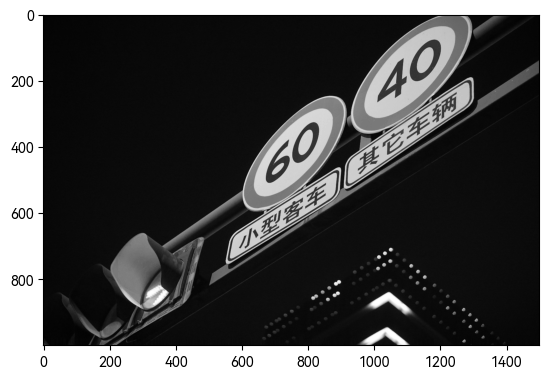

In [7]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("../img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, dsize=(img.shape[1] // 4, img.shape[0] // 4))
plt.subplot(111)
plt.imshow(img, cmap="gray")
plt.savefig("./images/img.png")
plt.show()


In [8]:
import numpy as np
from matplotlib import font_manager

font_manager.fontManager.addfont("../fonts/HarmonyOS_Sans_SC_Regular.ttf")
plt.rcParams["font.sans-serif"] = ["HarmonyOS Sans SC"]
plt.rcParams["axes.unicode_minus"] = False


def subplot(position: int, img: np.ndarray, title=None, cmap=None):
    plt.subplot(position)
    plt.title(title) if title != None else plt.title(f"{img.shape[0]}*{img.shape[1]}")
    plt.imshow(img, cmap) if cmap != None else plt.imshow(img)


## 二、Sobel 算子

### Sobel 滤波，分别对 x 和 y 方向进行滤波，并计算梯度幅值和梯度方向


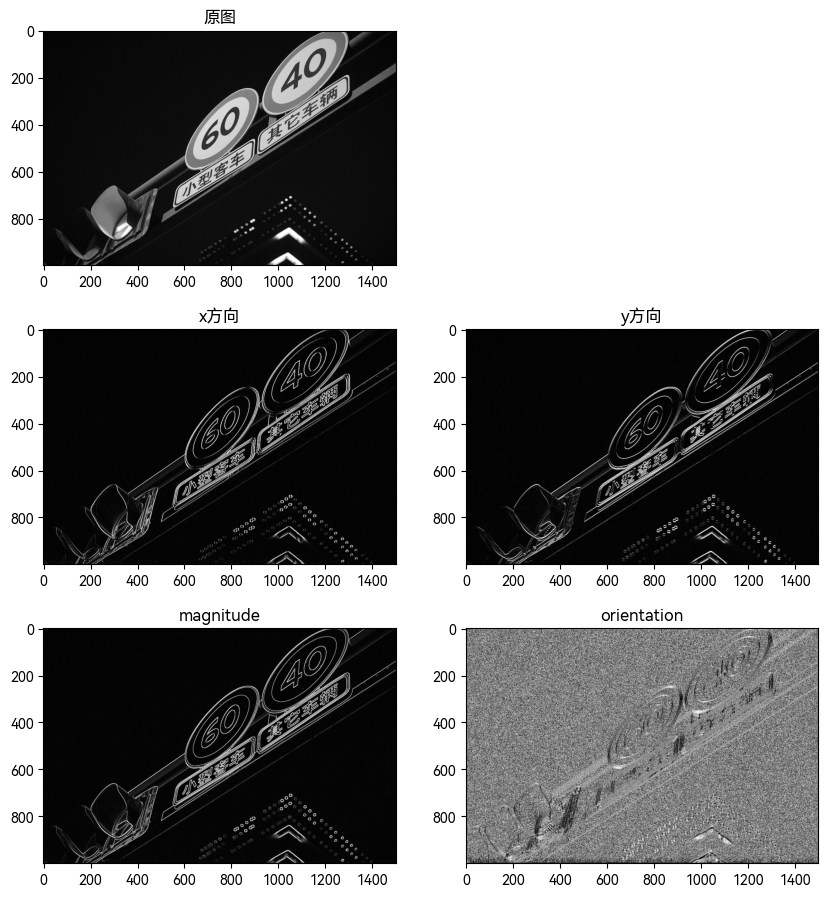

In [9]:
img1 = cv2.Sobel(img, cv2.CV_64F, 1, 0)
img2 = cv2.Sobel(img, cv2.CV_64F, 0, 1)
img1_ = cv2.convertScaleAbs(img1)
img2_ = cv2.convertScaleAbs(img2)
# magnitude orientation
magnitude, orientation = cv2.cartToPolar(img1_.astype(np.float64), img2_.astype(np.float64), angleInDegrees=True)

plt.figure(figsize=(2 ^ 8, 2 ^ 9))
subplot(321, img, "原图", cmap="gray")
subplot(323, img1_, "x方向", cmap="gray")
subplot(324, img2_, "y方向", cmap="gray")
subplot(325, magnitude, "magnitude", cmap="gray")
subplot(326, orientation, "orientation", cmap="gray")
plt.savefig("./images/sobel.png")
plt.show()


### 以热力图形式显示 x 方向的梯度、y 方向的梯度、梯度幅度、梯度角度


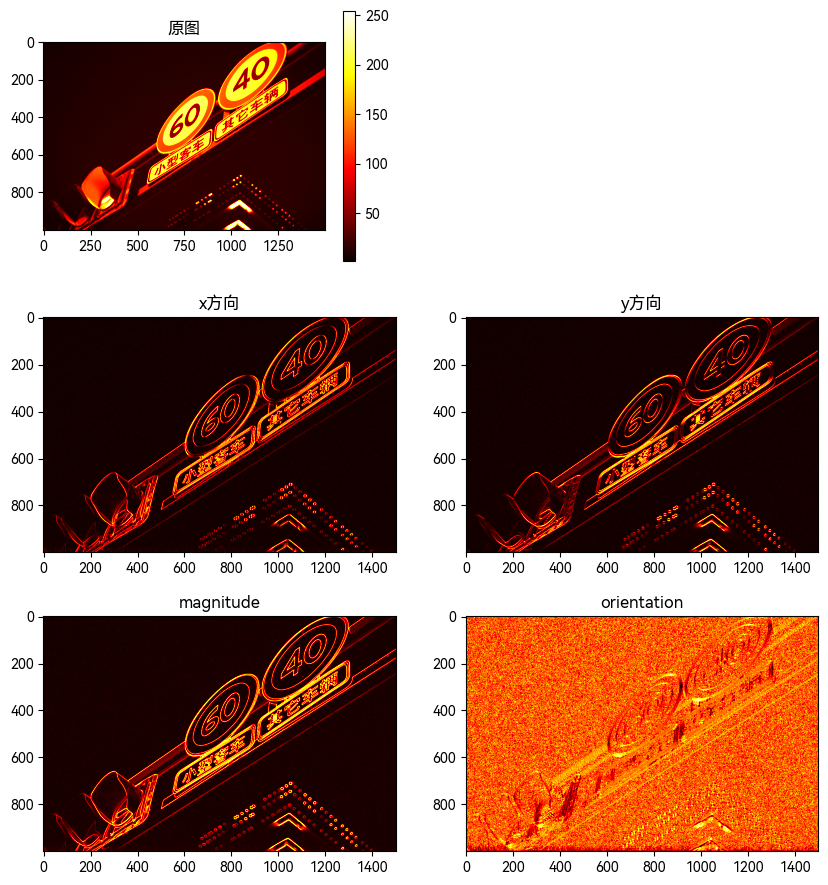

In [10]:
heat_img1 = cv2.applyColorMap(img1_, cv2.COLORMAP_JET)
heat_img2 = cv2.applyColorMap(img2_, cv2.COLORMAP_JET)
magnitude_ = cv2.convertScaleAbs(magnitude)
orientation_ = cv2.convertScaleAbs(orientation)
heat_magnitude = cv2.applyColorMap(magnitude_, cv2.COLORMAP_JET)
heat_orientation = cv2.applyColorMap(orientation_, cv2.COLORMAP_JET)


plt.figure(figsize=(2 ^ 8, 2 ^ 9))
subplot(321, img, "原图", cmap="hot")
plt.colorbar()
subplot(323, img1_, "x方向", cmap="hot")
subplot(324, img2_, "y方向", cmap="hot")
subplot(325, magnitude_, "magnitude", cmap="hot")
subplot(326, orientation_, "orientation", cmap="hot")
plt.savefig("./images/sobel_hot.png")
plt.show()


## 三、拉普拉斯滤波

### 滤波后的图像以及滤波结果与原图相加


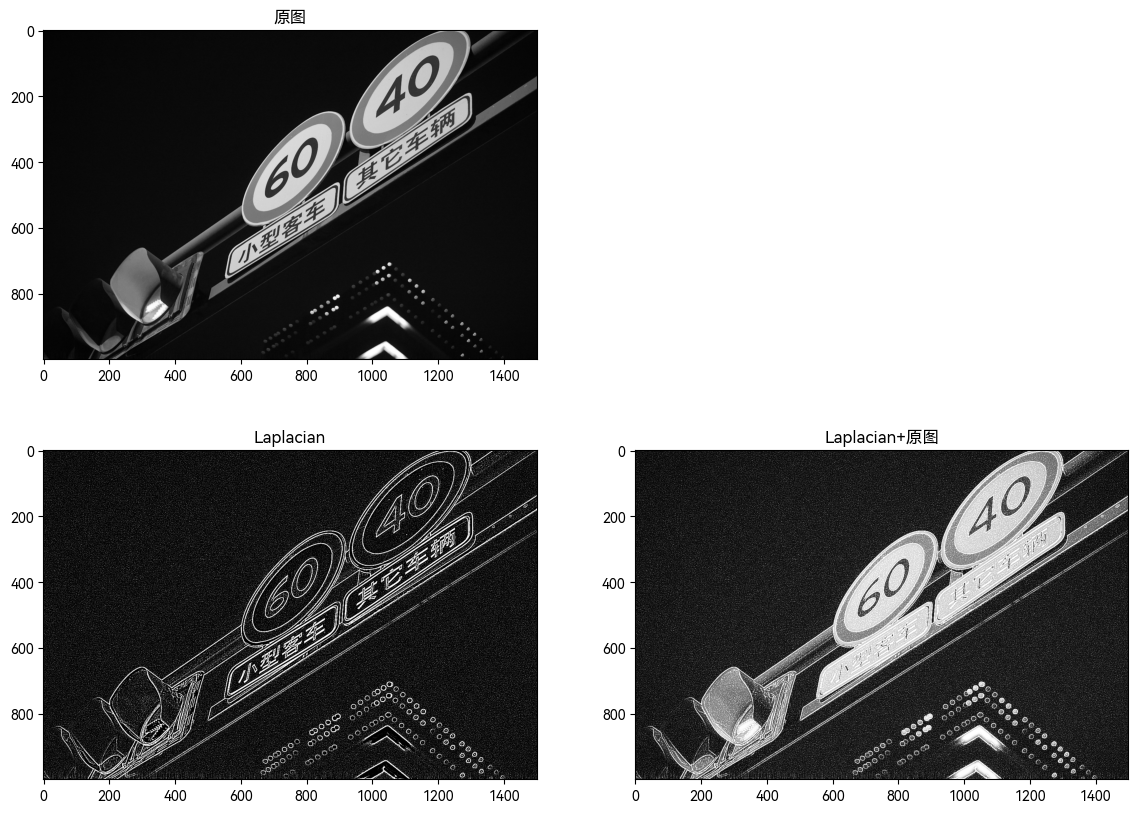

In [11]:
img1 = cv2.Laplacian(img, cv2.CV_8U, ksize=5)
img2 = cv2.add(img, img1)
plt.figure(figsize=(2 ^ 12, 2 ^ 8))
subplot(221, img, "原图", cmap="gray")
subplot(223, img1, "Laplacian", cmap="gray")
subplot(224, img2, "Laplacian+原图", cmap="gray")
plt.savefig("./images/laplacian.png")
plt.show()


## 四、Canny 滤波


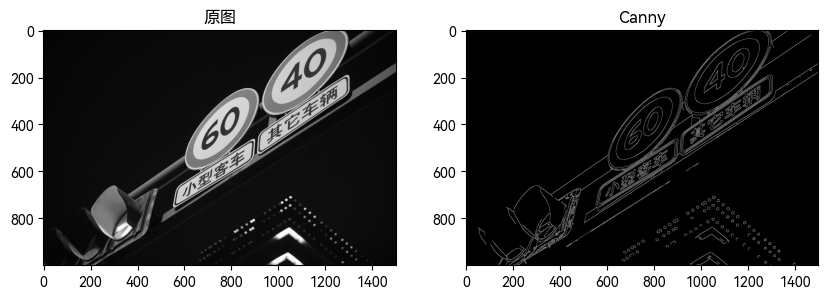

In [12]:
threshold1 = int(255*1/3)
threshold2 = int(255*2/3)

img1 = cv2.Canny(img, threshold1, threshold2)
plt.figure(figsize=(2 ^ 8, 2 ^ 6))
subplot(121, img, "原图", cmap="gray")
subplot(122, img1, "Canny", cmap="gray")
plt.savefig("./images/canny.png")
plt.show()
